The Synthetic Indian Automobile Crash Data dataset is a simulated collection of data aimed at exploring automobile crash characteristics and safety features within the context of India. With a diverse array of features, it offers a comprehensive view of various factors influencing automobile crashes and their severity. This dataset is particularly valuable for researchers, analysts, and policymakers seeking to gain insights into road safety dynamics, identify trends, and develop strategies for mitigating the impact of traffic accidents.

Features: Vehicle_make: The make or manufacturer of the vehicle involved in the crash, such as Maruti Suzuki, Hyundai, Tata Motors, Mahindra, or Honda.

Vehicle_type: The type of vehicle involved in the crash, including classifications like hatchback, sedan, SUV, or pickup.

Vehicle_year: The year of manufacture for the vehicle.

Engine_type: The type of engine powering the vehicle, such as petrol, diesel, CNG (compressed natural gas), or electric.

Engine_displacement: The displacement of the engine in cubic centimeters (cc), indicating its size and power output.

Transmission_type: Indicates whether the vehicle has a manual or automatic transmission.

Number_of_cylinders: The number of cylinders in the vehicle's engine, influencing its performance and efficiency.

Vehicle_weight: The weight of the vehicle in kilograms (kg), affecting its stability and crash dynamics.

Vehicle_length: The length of the vehicle in millimeters (mm).

Vehicle_width: The width of the vehicle in millimeters (mm).

Vehicle_height: The height of the vehicle in millimeters (mm).

Safety_rating: Assigns a safety rating to the vehicle based on predefined criteria, indicating its crashworthiness and occupant protection capabilities.

Number_of_airbags: Specifies the number of airbags installed in the vehicle, a crucial safety feature.

ABS_presence: Indicates whether the vehicle is equipped with an Anti-lock Braking System (ABS).

ESC_presence: Indicates whether the vehicle is equipped with Electronic Stability Control (ESC).

TCS_presence: Indicates whether the vehicle is equipped with Traction Control System (TCS).

TPMS_presence: Indicates whether the vehicle is equipped with a Tire Pressure Monitoring System (TPMS).

Crash_location: Specifies the location of the crash as urban or rural.

Weather_conditions: Describes prevailing weather conditions during the crash, including categories like clear, rain, or fog.

Road_surface_conditions: Indicates the condition of the road surface at the time of the crash, such as dry, wet, or muddy.

Time_of_day: Specifies the time of day when the crash occurred, categorized into morning, afternoon, evening, or night.

Day_of_week: Indicates the day of the week when the crash occurred, facilitating analysis of temporal patterns and trends.

Driver_age: The age of the driver involved in the crash.

Driver_gender: The gender of the driver involved in the crash (Male, Female).

Crash_severity: Classifies the severity of the crash as minor, moderate, or severe.

In [19]:
#load basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [20]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Read the dataset

In [21]:
data=pd.read_csv("D:\Capstone project\capstone_final_data.csv")
data.head(5)

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,Mahindra,sedan,2008,diesel,2001,automatic,6,1160,4072,1498,1500,2,2,NaN,1,1,0,rural,clear,dry,morning,Monday,75,Male,severe
1,Honda,sedan,2014,CNG,2959,manual,4,1949,3947,1933,1719,1,5,0,1,0,1,NaN,clear,NaN,night,Saturday,80,Female,severe
2,Tata Motors,SUV,2015,electric,1694,manual,4,1943,4785,1885,1628,4,1,TRUE,TRUE,TRUE,TRUE,rural,clear,dry,afternoon,Monday,41,Female,severe
3,Honda,pickup,2020,CNG,1168,manual,6,1013,3800,1470,1602,1,4,1,0,1,1,NaN,clear,dry,night,Monday,45,Female,severe
4,Honda,hatchback,2007,CNG,1735,manual,3,2134,4472,1827,1484,3,6,0,1,1,1,urban,clear,dry,afternoon,NaN,50,Female,severe


In [22]:
data.tail(5)

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
10023,Tata Motors,SUV,2016,petrol,2500,manual,4,2200,4800,1900,1680,4,4,TRUE,TRUE,TRUE,TRUE,suburban,cloudy,wet,afternoon,Wednesday,35,Female,minor
10024,Hyundai,hatchback,2019,diesel,2000,automatic,4,1300,4050,1770,1400,5,2,TRUE,TRUE,TRUE,TRUE,rural,rainy,wet,night,Friday,42,Male,minor
10025,Maruti Suzuki,SUV,2020,petrol,2800,automatic,6,1800,4600,1800,1700,5,6,TRUE,TRUE,TRUE,TRUE,urban,foggy,wet,morning,Thursday,31,Female,minor
10026,Tata Motors,pickup,2015,diesel,3200,manual,4,2100,5300,1950,1850,4,4,TRUE,TRUE,TRUE,TRUE,rural,clear,dry,afternoon,Tuesday,45,Male,minor
10027,Mahindra,sedan,2021,hybrid,2400,automatic,4,1500,4700,1800,1450,5,6,TRUE,TRUE,TRUE,TRUE,suburban,rainy,wet,night,Sunday,39,Female,minor


### Basic Analysis

In [23]:
print('no of rows:',data.shape[0])
print('no of columns:',data.shape[1])

no of rows: 10028
no of columns: 25


In [24]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10028 entries, 0 to 10027
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Vehicle_make             10028 non-null  object
 1   Vehicle_type             10028 non-null  object
 2   Vehicle_year             10028 non-null  int64 
 3   Engine_type              10028 non-null  object
 4   Engine_displacement      10028 non-null  int64 
 5   Transmission_type        10028 non-null  object
 6   Number_of_cylinders      10028 non-null  int64 
 7   Vehicle_weight           10028 non-null  int64 
 8   Vehicle_length           10028 non-null  int64 
 9   Vehicle_width            10028 non-null  int64 
 10  Vehicle_height           10028 non-null  int64 
 11  Safety_rating            10028 non-null  int64 
 12  Number_of_airbags        10028 non-null  int64 
 13  ABS_presence             9284 non-null   object
 14  ESC_presence             9276 non-null

In [25]:
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['Vehicle_year', 'Engine_displacement', 'Number_of_cylinders',
       'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height',
       'Safety_rating', 'Number_of_airbags', 'Driver_age'],
      dtype='object')

In [26]:
cat_cols=data.select_dtypes(include=object).columns
cat_cols

Index(['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Transmission_type',
       'ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence',
       'Crash_location', 'Weather_conditions', 'Road_surface_conditions',
       'Time_of_day', 'Day_of_week', 'Driver_gender', 'Crash_severity'],
      dtype='object')

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Vehicle_year,10028.0,2011.005784,6.611169,2000.0,2005.00,2011.0,2017.00,2022.0
Engine_displacement,10028.0,1971.186777,617.528571,0.0,1489.00,2001.0,2500.00,3200.0
Number_of_cylinders,10028.0,4.470183,1.236640,0.0,3.00,4.0,6.00,6.0
Vehicle_weight,10028.0,1646.449442,489.774435,800.0,1216.00,1645.0,2079.25,2499.0
Vehicle_length,10028.0,4239.951536,431.744096,3500.0,3866.00,4236.0,4613.00,5300.0
Vehicle_width,10028.0,1699.334763,172.897456,1400.0,1549.00,1700.0,1849.00,1999.0
Vehicle_height,10028.0,1596.788991,115.439615,1350.0,1497.75,1594.0,1696.00,1850.0
Safety_rating,10028.0,2.485241,1.122355,1.0,1.00,2.0,3.00,5.0
Number_of_airbags,10028.0,4.028520,2.000844,1.0,2.00,4.0,6.00,7.0
Driver_age,10028.0,51.075987,19.358620,18.0,34.00,51.0,68.00,84.0


### Univariate Analysis for numerical columns¶

In [28]:
num_cols

Index(['Vehicle_year', 'Engine_displacement', 'Number_of_cylinders',
       'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height',
       'Safety_rating', 'Number_of_airbags', 'Driver_age'],
      dtype='object')

In [29]:
len(num_cols)

10

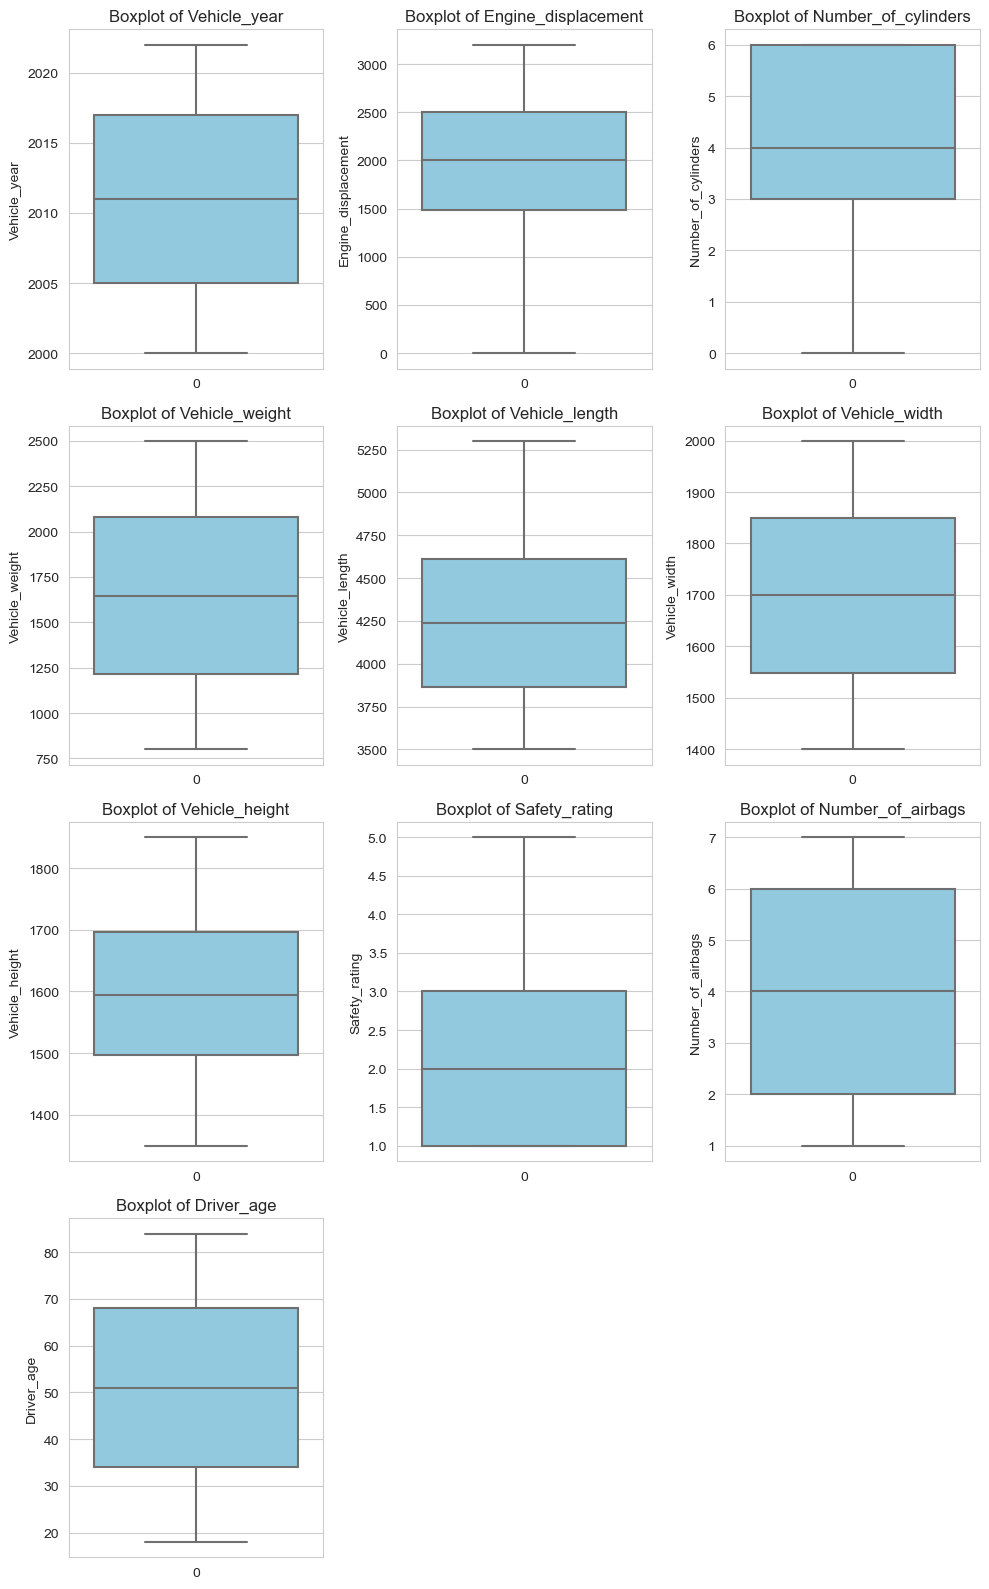

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 16))
j = 1
for i in num_cols:
    plt.subplot(4, 3, j)
    sns.boxplot(data[i], color='skyblue', fliersize=5)
    plt.title(f'Boxplot of {i}')
    plt.ylabel(i)
    j += 1

plt.tight_layout()
plt.show()

In [31]:
import plotly.graph_objects as go
fig = go.Figure()
for col in num_cols:
    fig.add_trace(go.Box(y=data[col], name=col))
fig.update_layout(
    title='Boxplots of Numerical Columns',
    xaxis_title='Columns',
    yaxis_title='Values',
    hovermode='closest'  # Set hovermode to 'closest' to highlight the closest point to the cursor
)
fig.show()

### Univariate Analysis for categorical columns¶¶

In [32]:
cat_cols

Index(['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Transmission_type',
       'ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence',
       'Crash_location', 'Weather_conditions', 'Road_surface_conditions',
       'Time_of_day', 'Day_of_week', 'Driver_gender', 'Crash_severity'],
      dtype='object')

In [33]:
len(cat_cols)

15

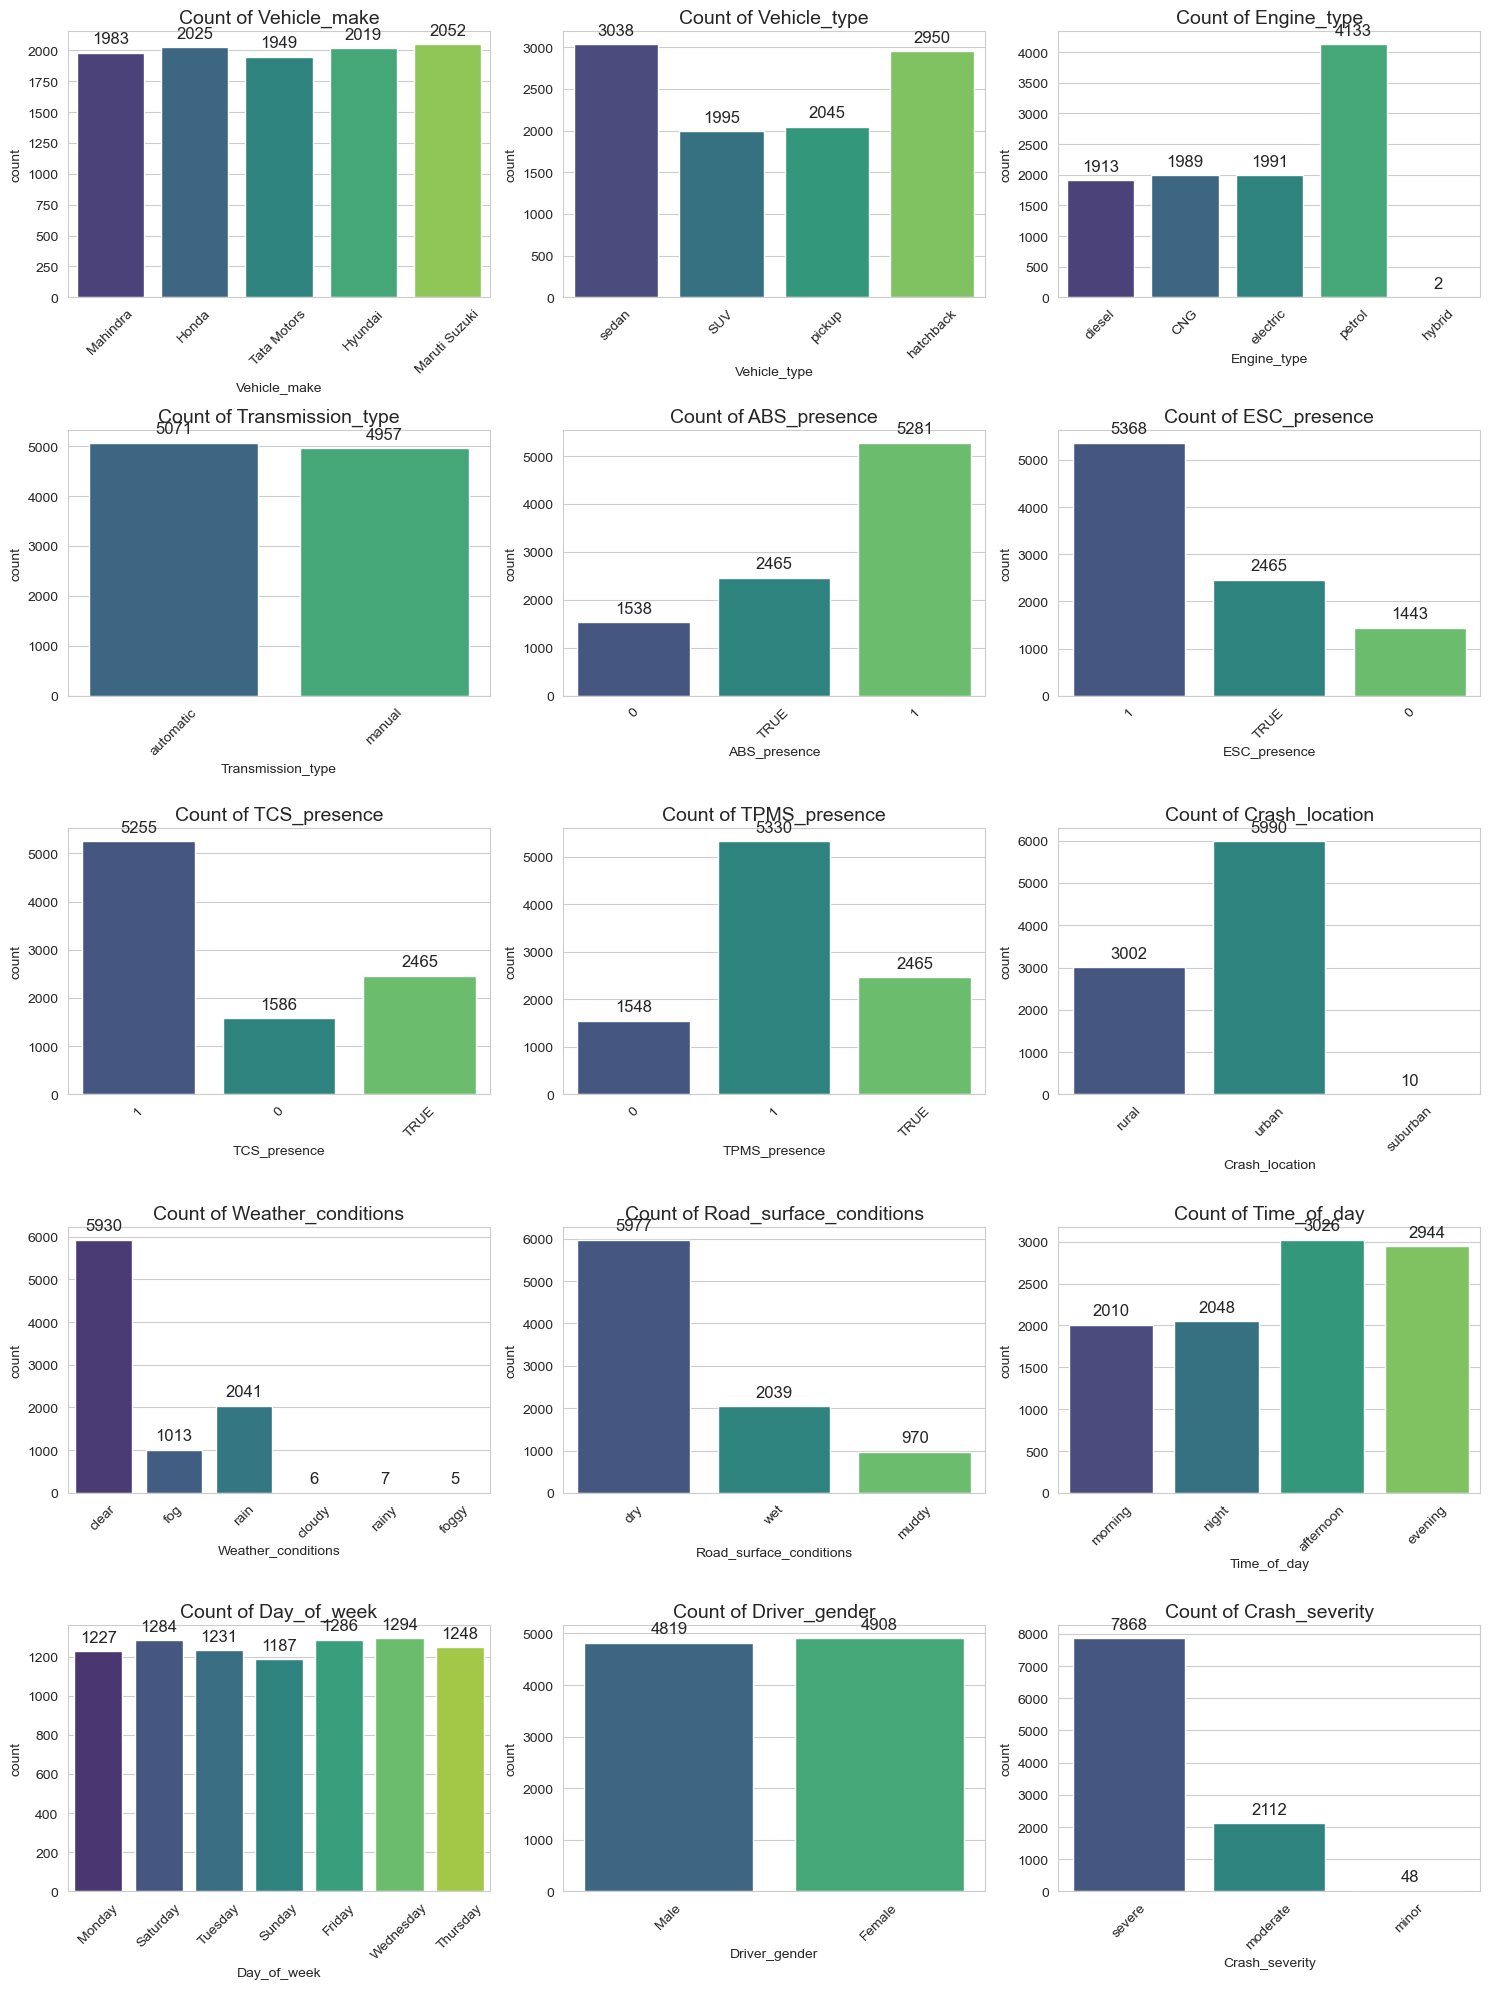

In [34]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 20))
j = 1
for col in cat_cols:
    plt.subplot(5, 3, j)
    ax = sns.countplot(x=data[col], palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}', fontsize=14)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    j += 1

plt.tight_layout()
plt.show()

### Bivariate analysis ¶¶

In [112]:
num_cols

Index(['Vehicle_year', 'Engine_displacement', 'Number_of_cylinders',
       'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height',
       'Safety_rating', 'Number_of_airbags', 'Driver_age'],
      dtype='object')

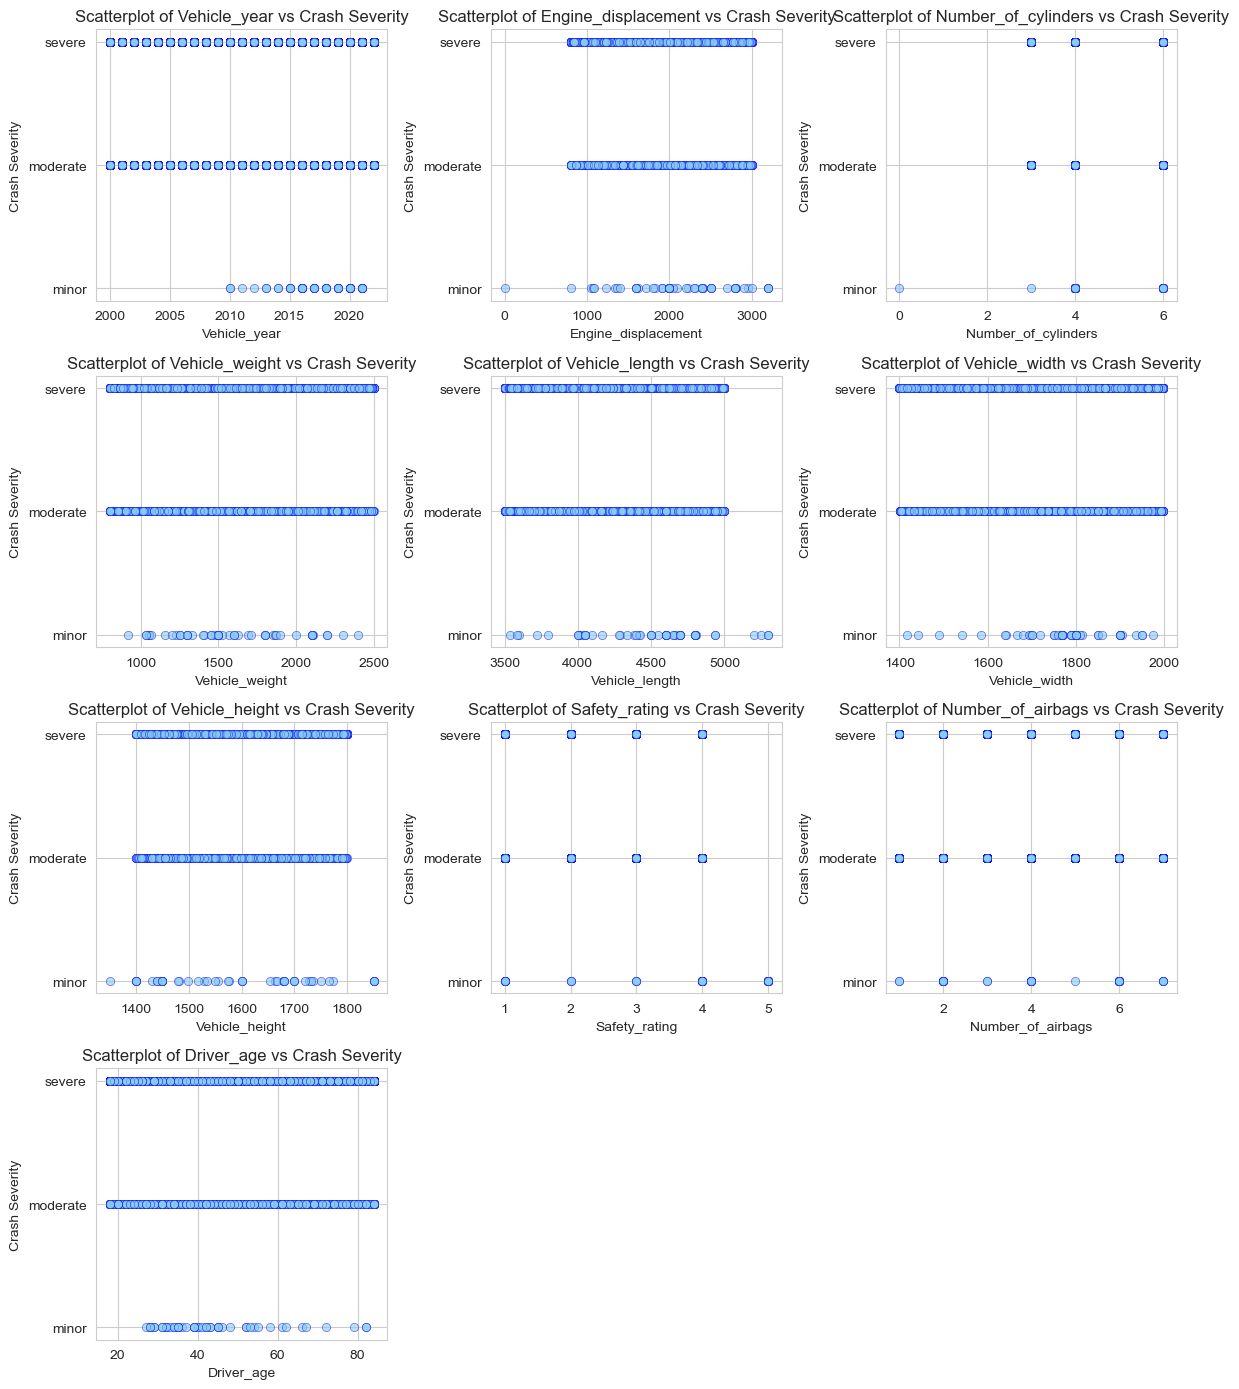

In [113]:
# Scatter Plot: Numeric columns vs Target variable
plt.figure(figsize=(12, 14))
j = 1
for i in num_cols:
    plt.subplot(4, 3, j)
    sns.scatterplot(x=data[i], y=data['Crash_severity'], color='skyblue', alpha=0.6, edgecolor='Blue')
    plt.title(f'Scatterplot of {i} vs Crash Severity', fontsize=12)
    plt.xlabel(i, fontsize=10)
    plt.ylabel('Crash Severity', fontsize=10)
    j += 1

plt.tight_layout()
plt.show()

### Bivariate analysis for categorical columns

In [114]:
cat_cols

Index(['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Transmission_type',
       'ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence',
       'Crash_location', 'Weather_conditions', 'Road_surface_conditions',
       'Time_of_day', 'Day_of_week', 'Driver_gender', 'Crash_severity'],
      dtype='object')

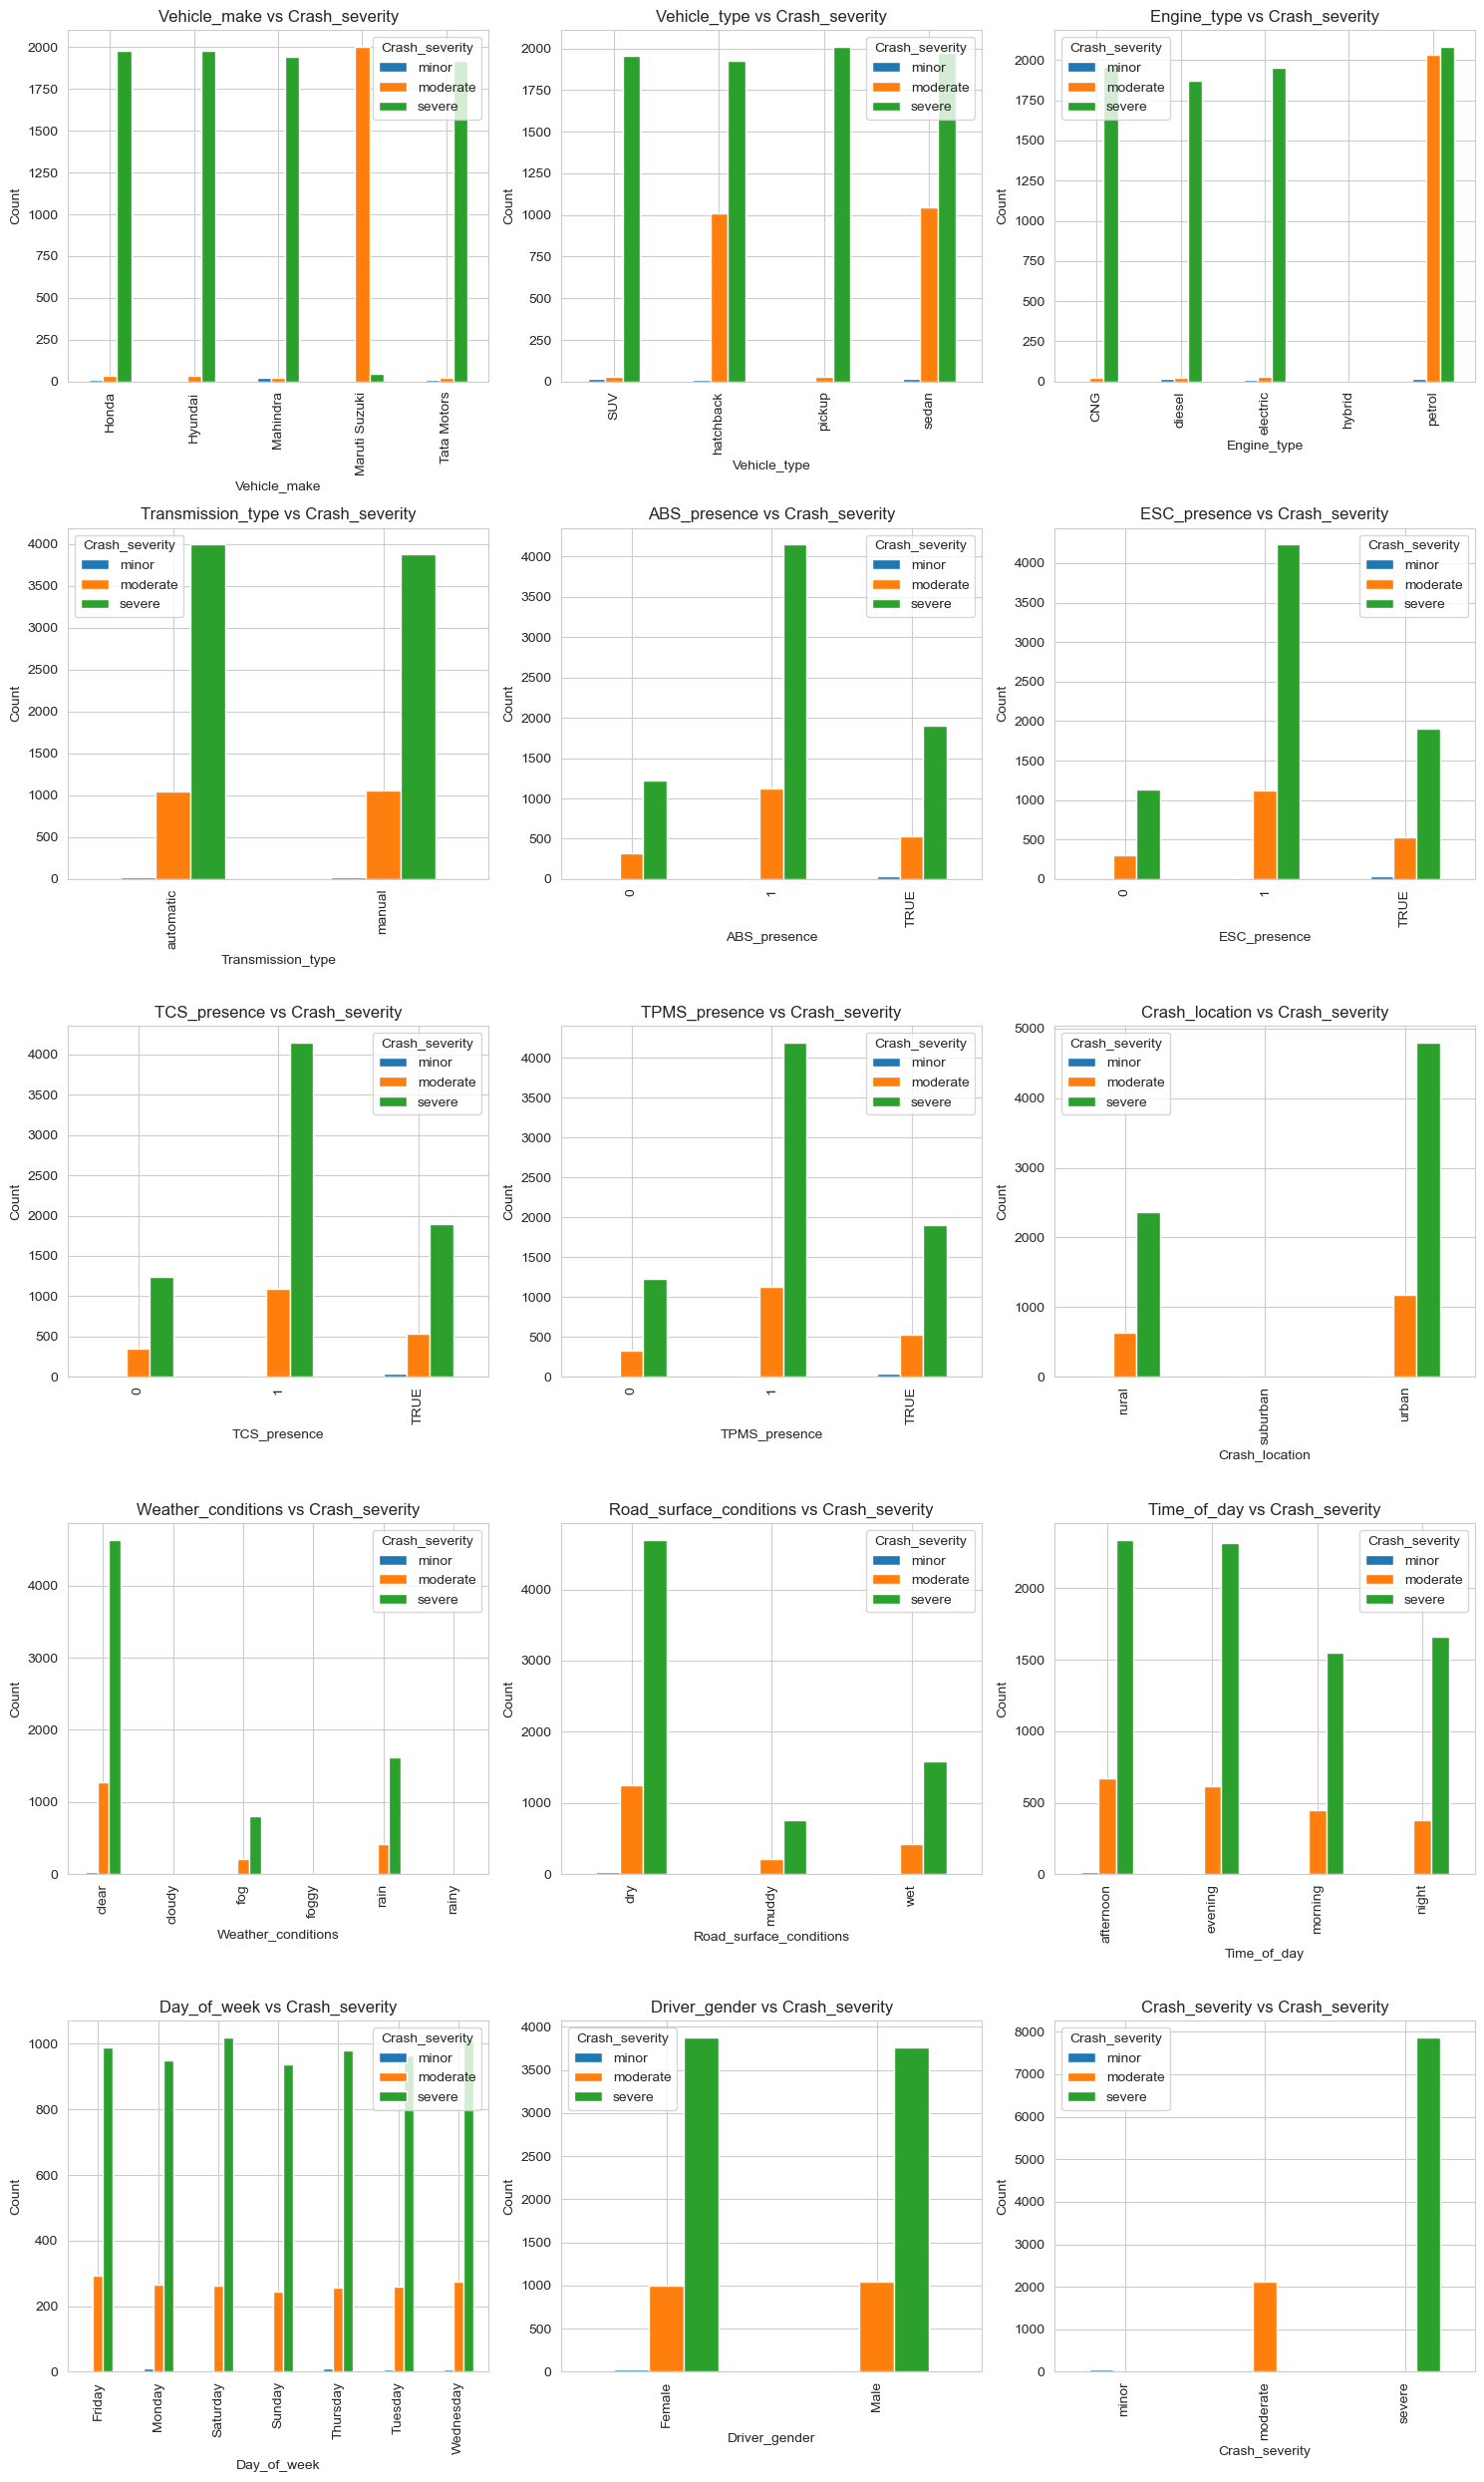

In [115]:
# Bivariate analysis: Categorical columns vs Target Variable

subplots_per_row = 3
sns.set_style("whitegrid")
num_rows = (len(cat_cols) + subplots_per_row - 1) // subplots_per_row

plt.figure(figsize=(15, 5 * num_rows))
j = 1
for col in cat_cols:
    plt.subplot(num_rows, subplots_per_row, j)
    pd.crosstab(data[col], data['Crash_severity']).plot(kind='bar', ax=plt.gca())
    plt.title(f'{col} vs Crash_severity')
    plt.xlabel(col)
    plt.ylabel('Count')
    j += 1

plt.tight_layout()
plt.show()






### correlation Plot

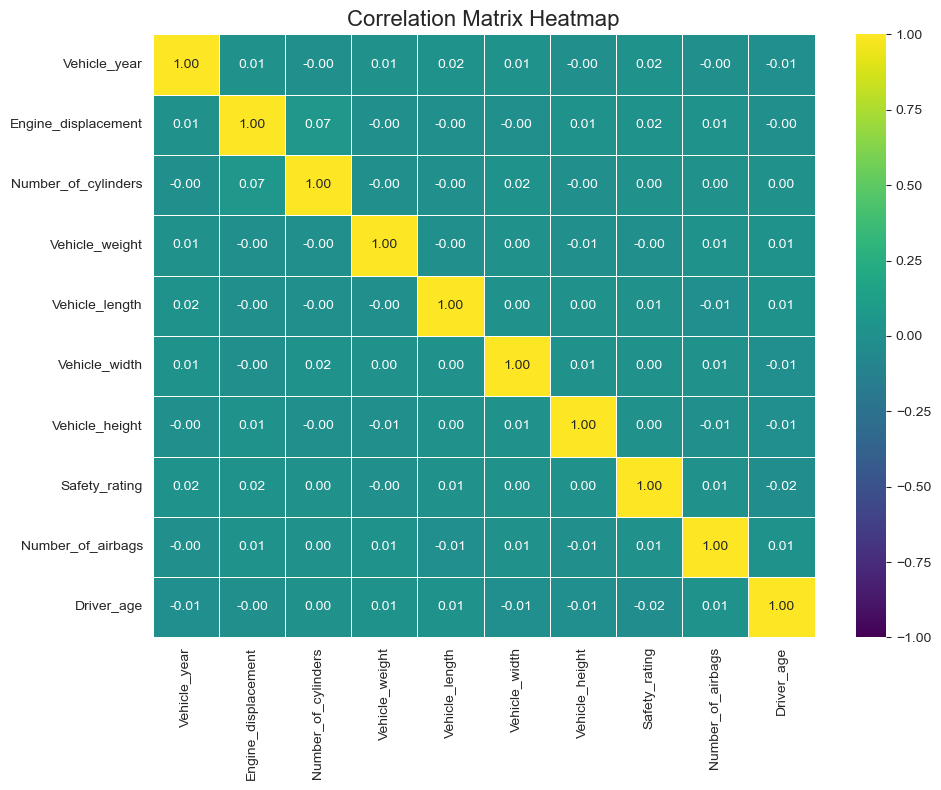

In [116]:
# Correlation Matrix: Numerical columns
corr_matrix = data[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Looking for the missing values

In [117]:
miss_value=data.isnull().sum().sort_values(ascending=False)
miss_value[miss_value>0]

Day_of_week                1271
Road_surface_conditions    1042
Weather_conditions         1026
Crash_location             1026
ESC_presence                752
ABS_presence                744
TCS_presence                722
TPMS_presence               685
Driver_gender               301
dtype: int64

### Treating the missing values

In [118]:
#Find the patterns to treat the missing values
missing_pattern = data.groupby('Crash_severity')['Day_of_week'].apply(lambda x: x.isna().sum())
print(missing_pattern)

Crash_severity
minor          3
moderate     253
severe      1015
Name: Day_of_week, dtype: int64


In [119]:
data['Day_of_week']=data.groupby(by='Crash_severity')['Day_of_week'].transform(lambda x:x.fillna(x.mode()[0]))

In [120]:
data['Road_surface_conditions']=data.groupby(by='Crash_severity')['Road_surface_conditions'].transform(lambda x:x.fillna(x.mode()[0]))

In [121]:
data['Crash_location']=data.groupby(by='Crash_severity')['Crash_location'].transform(lambda x:x.fillna(x.mode()[0]))

In [122]:
missing_pattern = data.groupby('Time_of_day')['Weather_conditions'].apply(lambda x: x.isna().sum())
print(missing_pattern)

Time_of_day
afternoon    299
evening      312
morning      210
night        205
Name: Weather_conditions, dtype: int64


In [123]:
data['Weather_conditions']=data.groupby(by='Time_of_day')['Weather_conditions'].transform(lambda x:x.fillna(x.mode()[0]))

In [124]:
data['ESC_presence']=data.groupby(by='Vehicle_type')['ESC_presence'].transform(lambda x:x.fillna(x.mode()[0]))

In [125]:
data['ABS_presence']=data.groupby(by='Vehicle_type')['ABS_presence'].transform(lambda x:x.fillna(x.mode()[0]))

In [126]:
data['TCS_presence']=data['TCS_presence'].fillna(data['TCS_presence'].mode()[0])

In [127]:
data['TPMS_presence']=data.groupby(by='Vehicle_type')['TPMS_presence'].transform(lambda x:x.fillna(x.mode()[0]))

In [128]:
data['Driver_gender']=data['Driver_gender'].fillna(data['Driver_gender'].mode()[0])

In [129]:
data.isnull().sum()

Vehicle_make               0
Vehicle_type               0
Vehicle_year               0
Engine_type                0
Engine_displacement        0
Transmission_type          0
Number_of_cylinders        0
Vehicle_weight             0
Vehicle_length             0
Vehicle_width              0
Vehicle_height             0
Safety_rating              0
Number_of_airbags          0
ABS_presence               0
ESC_presence               0
TCS_presence               0
TPMS_presence              0
Crash_location             0
Weather_conditions         0
Road_surface_conditions    0
Time_of_day                0
Day_of_week                0
Driver_age                 0
Driver_gender              0
Crash_severity             0
dtype: int64

### Data Cleaning

In [130]:
data['ABS_presence'].value_counts()

1       6025
TRUE    2465
0       1538
Name: ABS_presence, dtype: int64

In [131]:
data['ABS_presence']=data['ABS_presence'].replace({'1':1,'TRUE':1,'0':0})

In [132]:
data['ABS_presence'].value_counts()

1    8490
0    1538
Name: ABS_presence, dtype: int64

In [133]:
data['ESC_presence']=data['ESC_presence'].replace({'1':1,'TRUE':1,'0':0})

In [134]:
data['ESC_presence'].value_counts()

1    8585
0    1443
Name: ESC_presence, dtype: int64

In [135]:
data['TCS_presence']=data['TCS_presence'].replace({'1':1,'TRUE':1,'0':0})

In [136]:
data['TCS_presence'].value_counts()

1    8442
0    1586
Name: TCS_presence, dtype: int64

In [137]:
data['TPMS_presence']=data['TPMS_presence'].replace({'1':1,'TRUE':1,'0':0})

In [138]:
data['TPMS_presence'].value_counts()

1    8480
0    1548
Name: TPMS_presence, dtype: int64

### Looking for outliers

In [139]:
num_cols=data.select_dtypes(include=np.number).columns

In [140]:
num_cols

Index(['Vehicle_year', 'Engine_displacement', 'Number_of_cylinders',
       'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height',
       'Safety_rating', 'Number_of_airbags', 'ABS_presence', 'ESC_presence',
       'TCS_presence', 'TPMS_presence', 'Driver_age'],
      dtype='object')

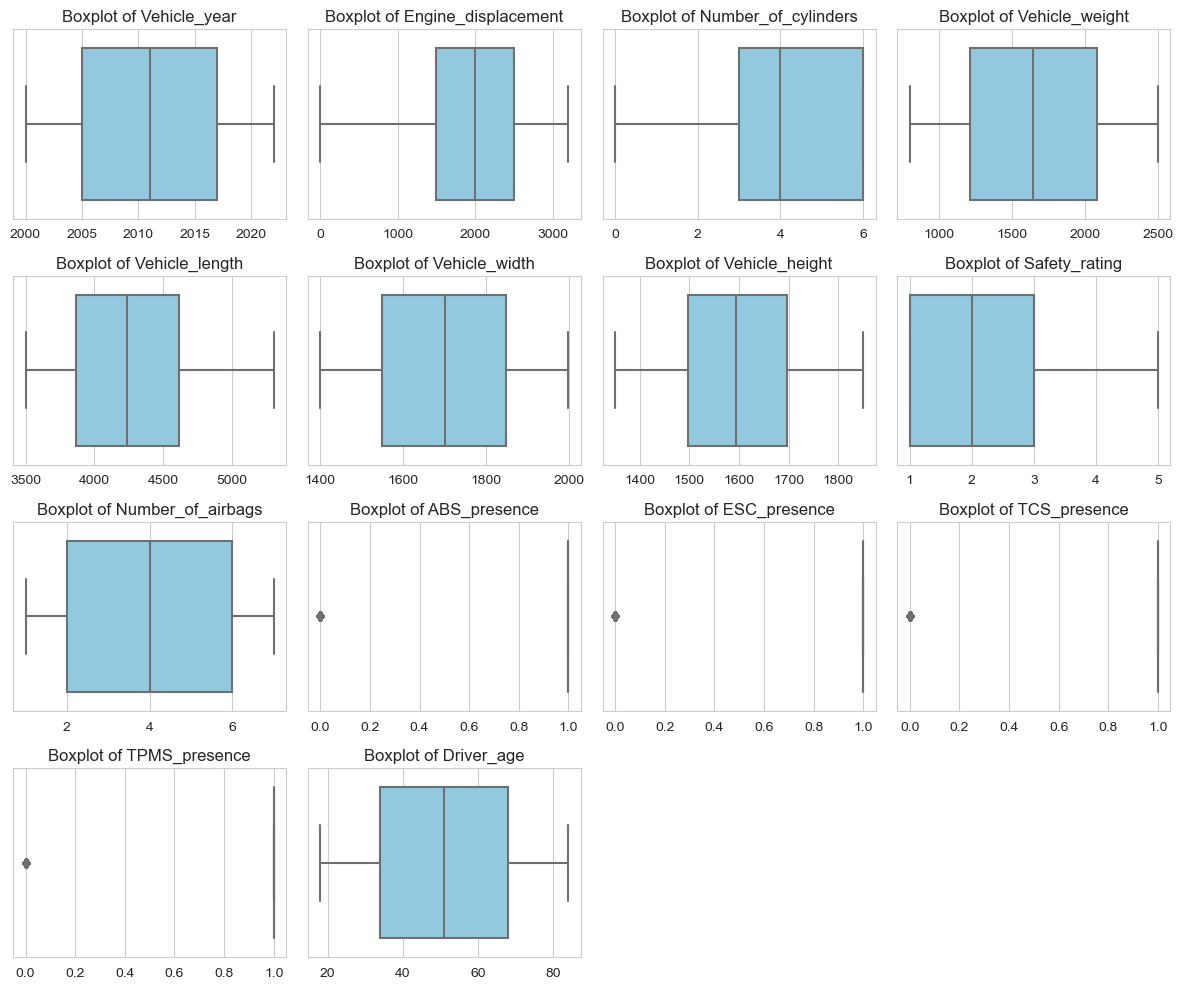

In [141]:
# Boxplots
plt.figure(figsize=(12, 10))
j = 1
for i in num_cols:
    plt.subplot(4, 4, j)
    sns.boxplot(x=data[i], color='skyblue')
    plt.title(f'Boxplot of {i}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    j += 1

plt.tight_layout()
plt.show()

### Feature Engineering¶

In [142]:
# Categorizing the model numbers into new model and old model
def categorize_year(year):
    if year >= 2010:
        return 'new_model'
    else:
        return 'old_model'

data['Vehicle_year'] = data['Vehicle_year'].apply(categorize_year)

In [143]:
data['Vehicle_year'].value_counts()

new_model    5690
old_model    4338
Name: Vehicle_year, dtype: int64

In [144]:
# Categorizing the age of driver
def categorize_age(age):
    if age <= 35:
        return 'young_age'
    elif 36 <= age <= 60:
        return 'middle_age'
    else:
        return 'old_age'

data['Driver_age'] = data['Driver_age'].apply(categorize_age)

In [145]:
data['Driver_age'].value_counts()

middle_age    3671
old_age       3629
young_age     2728
Name: Driver_age, dtype: int64

In [146]:
# Finding out area of front and side of the car
data['Car_Front_m2']=(data['Vehicle_width']*data['Vehicle_height'])/1000000
data['Car_side_m2']=(data['Vehicle_length']*data['Vehicle_height'])/1000000
data['Car_vol_m2']=(data['Vehicle_length']*data['Vehicle_height']*data['Vehicle_width'])/1000000000

In [147]:
data['Car_Front_m2'].value_counts()

2.346663    4
2.461640    3
2.798640    3
2.352896    3
2.324580    3
           ..
2.895963    1
3.449466    1
2.850288    1
2.744604    1
3.024000    1
Name: Car_Front_m2, Length: 9613, dtype: int64

In [148]:
del data['Vehicle_length']
del data['Vehicle_width']
del data['Vehicle_height']

In [149]:
data.head(5)

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity,Car_Front_m2,Car_side_m2,Car_vol_m2
0,Mahindra,sedan,old_model,diesel,2001,automatic,6,1160,2,2,1,1,1,0,rural,clear,dry,morning,Monday,old_age,Male,severe,2.247000,6.108000,9.149784
1,Honda,sedan,new_model,CNG,2959,manual,4,1949,1,5,0,1,0,1,urban,clear,dry,night,Saturday,old_age,Female,severe,3.322827,6.784893,13.115198
2,Tata Motors,SUV,new_model,electric,1694,manual,4,1943,4,1,1,1,1,1,rural,clear,dry,afternoon,Monday,middle_age,Female,severe,3.068780,7.789980,14.684112
3,Honda,pickup,new_model,CNG,1168,manual,6,1013,1,4,1,0,1,1,urban,clear,dry,night,Monday,middle_age,Female,severe,2.354940,6.087600,8.948772
4,Honda,hatchback,old_model,CNG,1735,manual,3,2134,3,6,0,1,1,1,urban,clear,dry,afternoon,Saturday,middle_age,Female,severe,2.711268,6.636448,12.124790


In [150]:
data['Crash_severity']=data['Crash_severity'].map({'severe':0,'moderate':1,'minor':2})

### Encoding

In [151]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['Vehicle_make', 'Vehicle_type', 'Vehicle_year', 'Engine_type',
       'Transmission_type', 'Crash_location', 'Weather_conditions',
       'Road_surface_conditions', 'Time_of_day', 'Day_of_week', 'Driver_age',
       'Driver_gender'],
      dtype='object')

In [152]:
data.dropna(inplace=True)

In [153]:
encoded_data=pd.get_dummies(data.drop(columns=['Crash_severity']),drop_first=True).astype(int)

In [154]:
encoded_data.head(4)

,Engine_displacement,Number_of_cylinders,Vehicle_weight,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Car_Front_m2,Car_side_m2,Car_vol_m2,Vehicle_make_Hyundai,Vehicle_make_Mahindra,Vehicle_make_Maruti Suzuki,Vehicle_make_Tata Motors,Vehicle_type_hatchback,Vehicle_type_pickup,Vehicle_type_sedan,Vehicle_year_old_model,Engine_type_diesel,Engine_type_electric,Engine_type_hybrid,Engine_type_petrol,Transmission_type_manual,Crash_location_suburban,Crash_location_urban,Weather_conditions_cloudy,Weather_conditions_fog,Weather_conditions_foggy,Weather_conditions_rain,Weather_conditions_rainy,Road_surface_conditions_muddy,Road_surface_conditions_wet,Time_of_day_evening,Time_of_day_morning,Time_of_day_night,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Driver_age_old_age,Driver_age_young_age,Driver_gender_Male
0,2001,6,1160,2,2,1,1,1,0,2,6,9,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
1,2959,4,1949,1,5,0,1,0,1,3,6,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,1694,4,1943,4,1,1,1,1,1,3,7,14,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1168,6,1013,1,4,1,0,1,1,2,6,8,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [155]:
encoded_data.shape

(10028, 46)

### Train-Test-Split

In [156]:
x= encoded_data
y= data['Crash_severity']

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=42)

In [159]:
print(f'X-train:{x_train.shape}\nX-test:{x_test.shape}\nY-train:{y_train.shape}\nY-test:{y_test.shape}')

X-train:(7019, 46)
X-test:(3009, 46)
Y-train:(7019,)
Y-test:(3009,)


In [91]:
# To proove that the distribution in y_train and y_test is same as y
# We will chi-square goodness of fit.

In [92]:
expected = y.value_counts(normalize=True).values

In [93]:
observed_test = y_test.value_counts(normalize=True).values

In [94]:
import scipy.stats as stats

In [95]:
# Ho: The distribution is same
# Ha: The distribution is not same

stats.chisquare(observed_test,expected)

Power_divergenceResult(statistic=0.00045415325240492747, pvalue=0.9997729491537433)

In [109]:
observed_train = y_train.value_counts(normalize=True).values

In [110]:
# Ho: The distribution is same
# Ha: The distribution is not same

stats.chisquare(observed_train,expected)

Power_divergenceResult(statistic=8.346344747661969e-05, pvalue=0.9999582691470179)

#### The high p-values obtained from the chi-square goodness of fit tests for both the training and testing datasets suggest that there is no significant difference between the observed distributions and the expected distribution. Therefore, we fail to reject the null hypothesis.

## Inference:

There is no evidence to suggest that the distributions of the target variable (y) in the training and testing datasets differ significantly from the overall distribution.
This indicates that the data splitting process used to create the training and testing datasets has not introduced any significant bias or imbalance in the distribution of the target variable.
The model trained on the training dataset and evaluated on the testing dataset should generalize well to unseen data, as the distribution of the target variable in the testing dataset closely mirrors that of the overall dataset (y).

In [68]:
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




smote_tomek = SMOTETomek(sampling_strategy='auto')


X_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)


In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score,roc_curve,recall_score,precision_score,f1_score,confusion_matrix,classification_report,accuracy_score

In [70]:
models = []
accuracy = []
precison = []
recall = []
f1 = []

In [71]:
from xgboost import XGBClassifier

In [ ]:
pip install xgboost


In [72]:
from sklearn.preprocessing import LabelBinarizer

In [73]:
global models_df
models_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall_class_0', 'Recall_class_1', 'Recall_class_2',
                                   'Precision_class_0', 'Precision_class_1', 'Precision_class_2',
                                   'F1_class_0', 'F1_class_1', 'F1_class_2'])

In [74]:
from sklearn.metrics import auc

def model_validation(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred = m.predict(xtest)
    prob = m.predict_proba(xtest)

    print('Confusion matrix:\n', confusion_matrix(ytest, pred))
    print('Classification report:\n', classification_report(ytest, pred))

    # Convert multi-class labels to binary labels
    lb = LabelBinarizer()
    ytest_bin = lb.fit_transform(ytest)

    # Compute micro-average ROC AUC
    roc_auc = roc_auc_score(ytest_bin, prob, average='micro')
    print('Micro-average ROC AUC:', roc_auc)

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(m.classes_)):
        fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {m.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()  

    
    plt.close()

    resp = input('Do you want to save this model in summary? Y/N')
    if resp.lower() == 'y':
        
        accuracy = accuracy_score(ytest, pred)
        recall = recall_score(ytest, pred, average=None)
        precision = precision_score(ytest, pred, average=None)
        f1 = f1_score(ytest, pred, average=None)

        
        global models_df
        models_df = models_df.append({'Model': str(m),
                                      'Accuracy': accuracy,
                                      'Recall_class_0': recall[0],
                                      'Recall_class_1': recall[1],
                                      'Recall_class_2': recall[2],
                                      'Precision_class_0': precision[0],
                                      'Precision_class_1': precision[1],
                                      'Precision_class_2': precision[2],
                                      'F1_class_0': f1[0],
                                      'F1_class_1': f1[1],
                                      'F1_class_2': f1[2]},
                                     ignore_index=True)


Confusion matrix:
 [[2347   20    0]
 [  32  600    0]
 [   3    0    7]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2367
         1.0       0.97      0.95      0.96       632
         2.0       1.00      0.70      0.82        10

    accuracy                           0.98      3009
   macro avg       0.98      0.88      0.92      3009
weighted avg       0.98      0.98      0.98      3009

Micro-average ROC AUC: 0.9964609053088878


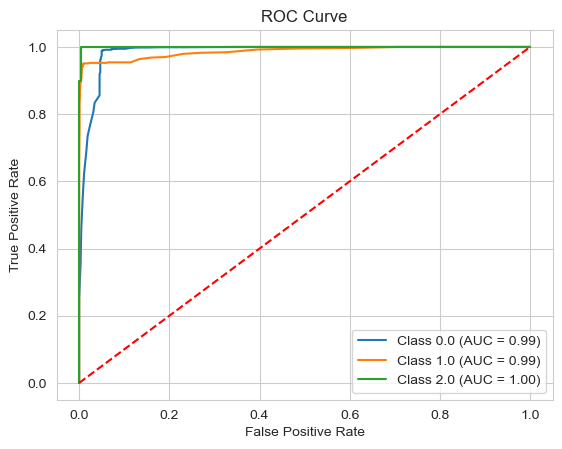

Do you want to save this model in summary? Y/Ny


In [75]:
model_validation(RandomForestClassifier(n_estimators=100,random_state=42),X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2277   81    9]
 [  53  579    0]
 [   1    0    9]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2367
         1.0       0.88      0.92      0.90       632
         2.0       0.50      0.90      0.64        10

    accuracy                           0.95      3009
   macro avg       0.78      0.93      0.84      3009
weighted avg       0.95      0.95      0.95      3009

Micro-average ROC AUC: 0.9781668067692347


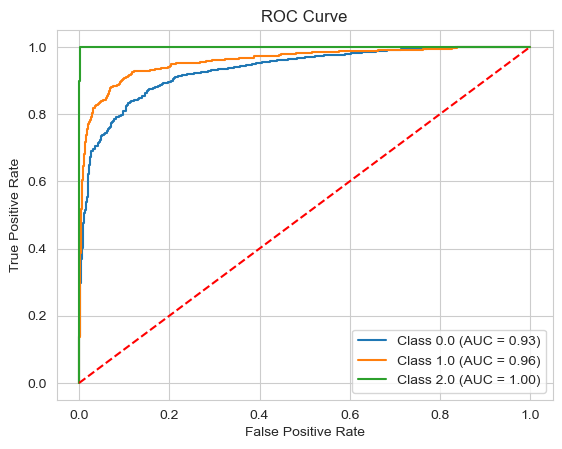

Do you want to save this model in summary? Y/Ny


In [76]:
model_validation(AdaBoostClassifier(),X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2336   24    7]
 [  33  599    0]
 [   0    0   10]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2367
         1.0       0.96      0.95      0.95       632
         2.0       0.59      1.00      0.74        10

    accuracy                           0.98      3009
   macro avg       0.85      0.98      0.89      3009
weighted avg       0.98      0.98      0.98      3009

Micro-average ROC AUC: 0.9975335983850818


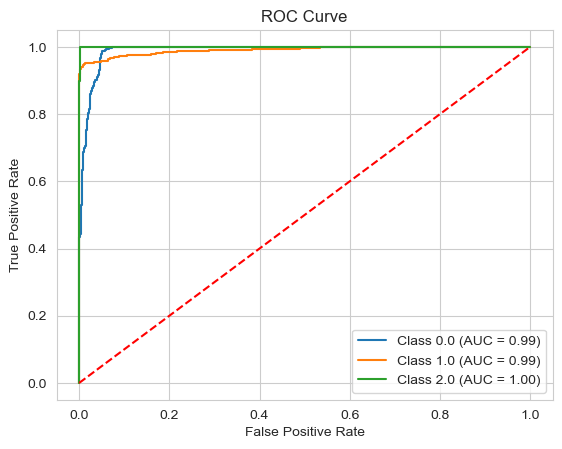

Do you want to save this model in summary? Y/Ny


In [77]:
model_validation(GradientBoostingClassifier(n_estimators=100),X_train_resampled,y_train_resampled,
                x_test,y_test)

Confusion matrix:
 [[2155   16  196]
 [  35  597    0]
 [   0    0   10]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.91      0.95      2367
         1.0       0.97      0.94      0.96       632
         2.0       0.05      1.00      0.09        10

    accuracy                           0.92      3009
   macro avg       0.67      0.95      0.67      3009
weighted avg       0.98      0.92      0.95      3009

Micro-average ROC AUC: 0.9793170063311781


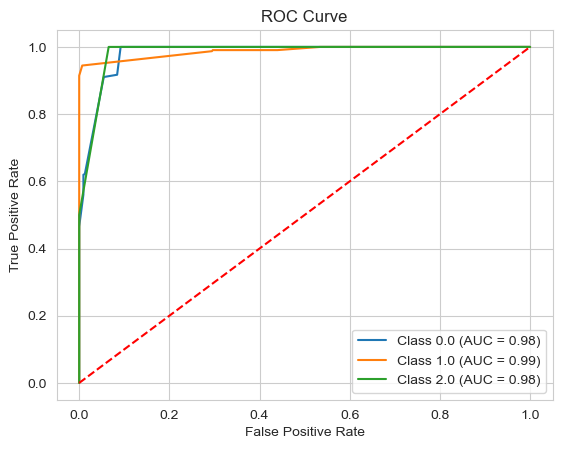

Do you want to save this model in summary? Y/Ny


In [78]:
model_validation(DecisionTreeClassifier(max_depth=5),X_train_resampled,y_train_resampled,
                x_test,y_test)

In [79]:
models_df

,Model,Accuracy,Recall_class_0,Recall_class_1,Recall_class_2,Precision_class_0,Precision_class_1,Precision_class_2,F1_class_0,F1_class_1,F1_class_2
0,RandomForestClassifier(random_state=42),0.981722,0.991550,0.949367,0.7,0.985306,0.967742,1.000000,0.988419,0.958466,0.823529
1,AdaBoostClassifier(),0.952144,0.961977,0.916139,0.9,0.976834,0.877273,0.500000,0.969349,0.896285,0.642857
2,GradientBoostingClassifier(),0.978730,0.986903,0.947785,1.0,0.986070,0.961477,0.588235,0.986486,0.954582,0.740741
3,DecisionTreeClassifier(max_depth=5),0.917913,0.910435,0.944620,1.0,0.984018,0.973899,0.048544,0.945798,0.959036,0.092593


Confusion matrix:
 [[2344   20    3]
 [  36  596    0]
 [   0    0   10]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2367
         1.0       0.97      0.94      0.96       632
         2.0       0.77      1.00      0.87        10

    accuracy                           0.98      3009
   macro avg       0.91      0.98      0.94      3009
weighted avg       0.98      0.98      0.98      3009

Micro-average ROC AUC: 0.9977357171865374


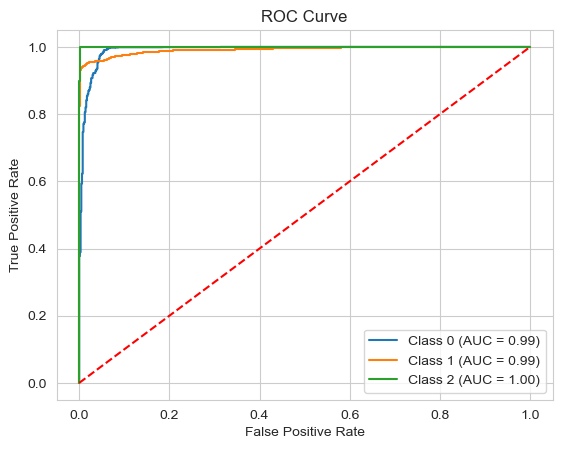

Do you want to save this model in summary? Y/Ny


In [80]:
model_validation(XGBClassifier(),X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2298   31   38]
 [  50  581    1]
 [   1    1    8]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2367
         1.0       0.95      0.92      0.93       632
         2.0       0.17      0.80      0.28        10

    accuracy                           0.96      3009
   macro avg       0.70      0.90      0.73      3009
weighted avg       0.97      0.96      0.96      3009

Micro-average ROC AUC: 0.9922008650022017


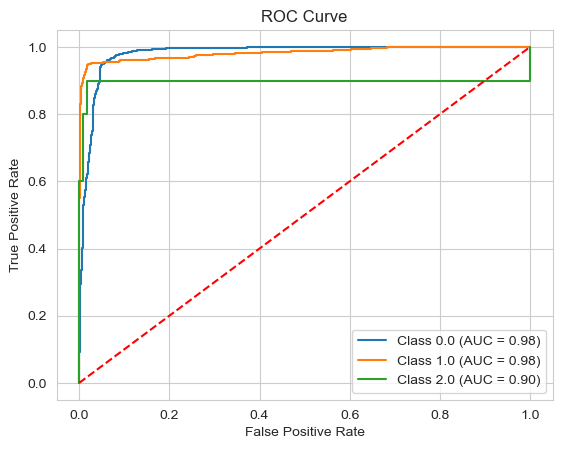

Do you want to save this model in summary? Y/Ny


In [118]:
model_validation(MLPClassifier(),X_train_resampled,y_train_resampled,x_test,y_test)

In [81]:
models_df

,Model,Accuracy,Recall_class_0,Recall_class_1,Recall_class_2,Precision_class_0,Precision_class_1,Precision_class_2,F1_class_0,F1_class_1,F1_class_2
0,RandomForestClassifier(random_state=42),0.981722,0.991550,0.949367,0.7,0.985306,0.967742,1.000000,0.988419,0.958466,0.823529
1,AdaBoostClassifier(),0.952144,0.961977,0.916139,0.9,0.976834,0.877273,0.500000,0.969349,0.896285,0.642857
2,GradientBoostingClassifier(),0.978730,0.986903,0.947785,1.0,0.986070,0.961477,0.588235,0.986486,0.954582,0.740741
3,DecisionTreeClassifier(max_depth=5),0.917913,0.910435,0.944620,1.0,0.984018,0.973899,0.048544,0.945798,0.959036,0.092593
4,"XGBClassifier(base_score=None, booster=None, c...",0.980392,0.990283,0.943038,1.0,0.984874,0.967532,0.769231,0.987571,0.955128,0.869565


In [82]:
from sklearn.model_selection import GridSearchCV

In [111]:
params =param_grid = {
    'learning_rate':[1,0.1,0.01],
    'n_estimators':[50,75,100,120],
    'max_depth':[5,6,7,8,9],
    'min_child_weight': [1, 2, 3],
}


In [112]:
gscv = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=5,verbose=2,scoring='f1')

In [113]:
gscv.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=75; total time=   0.4s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=75; total time=   0.4s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=75; total time=   0.4s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=75; total time=   0.4s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=75; total 

[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=75; total time=   0.4s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=75; total time=   0.4s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=75; total time=   0.5s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=75; total time=   0.5s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=120; total time=   0.6s
[CV] END learning_rate=1, max_depth=6, min_c

[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.3s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.3s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.5s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=120; total time=   1.9s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=120; total time=   1.9s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=120; total time=   2.0s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=120; total time=   1.9s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=120; total time=   2.7s
[CV] END learning_rate=1, max_depth=8, min_child_weight=1, n_estimators=50; total time=   1.6s
[CV] END learning_rate=1, max_depth=8, min_child_weight=1, n_estimators=50; total time=   1.4s
[CV] END learning_rate=1, max_depth=8, min

[CV] END learning_rate=1, max_depth=9, min_child_weight=1, n_estimators=120; total time=   1.2s
[CV] END learning_rate=1, max_depth=9, min_child_weight=1, n_estimators=120; total time=   1.4s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=75; total time=   0.7s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=75; total time=   0.7s
[CV] END learning_rate=1, max_depth=9, min_child_weight=2, n_estimators=75; total time=   0.7s
[CV] END learning_rate=1, max_depth=9, min_child

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=75; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=75; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=75; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=75; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=75; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1,

[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=75; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=75; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=120; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=120; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=120; total time=   0.9s
[CV] END learning_rate

[CV] END learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=120; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=120; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=120; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=120; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=120; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=

[CV] END learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=120; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=120; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=75; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=75; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=75; total time=   0.8s
[CV] END learning_ra

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=50; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=50; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=50; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=75; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=75; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=75; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=75; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=75; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=100; total time=   1.4s
[CV] END learning_

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=75; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=75; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=75; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=75; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=120; total time=   1.7s
[CV] END learn

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=120; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=120; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=120; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=120; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=120; total time=   1.9s
[CV] END l

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 75, 100, 120]},
             scoring='f1', verbose=2)

In [114]:
gscv.best_params_

{'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}

In [115]:
final=XGBClassifier(**gscv.best_params_)

Confusion matrix:
 [[2348   14    5]
 [  41  591    0]
 [   1    0    9]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2367
         1.0       0.98      0.94      0.96       632
         2.0       0.64      0.90      0.75        10

    accuracy                           0.98      3009
   macro avg       0.87      0.94      0.90      3009
weighted avg       0.98      0.98      0.98      3009

Micro-average ROC AUC: 0.997500905945065


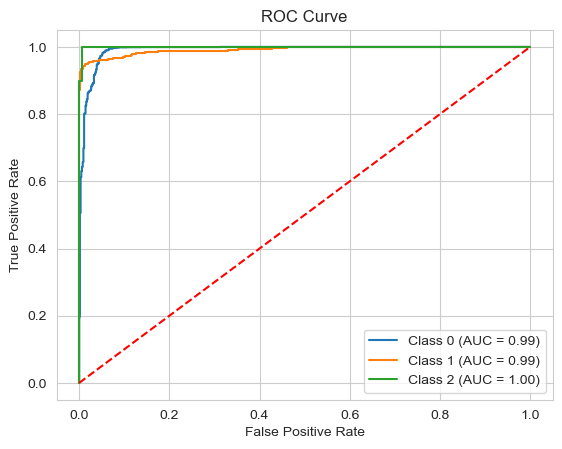

Do you want to save this model in summary? Y/Nn


In [119]:
model_validation(final,X_train_resampled,y_train_resampled,x_test,y_test)

In [91]:
models_df

,Model,Accuracy,Recall_class_0,Recall_class_1,Recall_class_2,Precision_class_0,Precision_class_1,Precision_class_2,F1_class_0,F1_class_1,F1_class_2
0,RandomForestClassifier(random_state=42),0.981722,0.991550,0.949367,0.7,0.985306,0.967742,1.000000,0.988419,0.958466,0.823529
1,AdaBoostClassifier(),0.952144,0.961977,0.916139,0.9,0.976834,0.877273,0.500000,0.969349,0.896285,0.642857
2,GradientBoostingClassifier(),0.978730,0.986903,0.947785,1.0,0.986070,0.961477,0.588235,0.986486,0.954582,0.740741
3,DecisionTreeClassifier(max_depth=5),0.917913,0.910435,0.944620,1.0,0.984018,0.973899,0.048544,0.945798,0.959036,0.092593
4,"XGBClassifier(base_score=None, booster=None, c...",0.980392,0.990283,0.943038,1.0,0.984874,0.967532,0.769231,0.987571,0.955128,0.869565
5,"XGBClassifier(base_score=None, booster=None, c...",0.979727,0.991973,0.935127,0.9,0.982427,0.976860,0.642857,0.987177,0.955538,0.750000


In [120]:
pd.DataFrame({'Features':x_test.columns,'Importance':final.feature_importances_}).sort_values(by=['Importance'],ascending=False)

,Features,Importance
25,Crash_location_suburban,0.219861
14,Vehicle_make_Maruti Suzuki,0.214842
26,Crash_location_urban,0.091617
19,Vehicle_year_old_model,0.088347
3,Safety_rating,0.049670
12,Vehicle_make_Hyundai,0.044490
15,Vehicle_make_Tata Motors,0.037242
13,Vehicle_make_Mahindra,0.032931
38,Day_of_week_Saturday,0.030738
21,Engine_type_electric,0.027356


In [125]:
xgb_model =XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [126]:
import joblib

In [127]:
joblib.dump(xgb_model, 'xgb_classifier.joblib')

['xgb_classifier.joblib']